<a href="https://colab.research.google.com/github/OsamuDazai666/inlights-nstp/blob/main/morphological_operations_INLIGHTS_26_06_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cv2_imshow() is an alternate to cv2.imshow() since the orginal function won't work in cloud

# Imports

In [7]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/MyDrive')

Drive already mounted at /MyDrive; to attempt to forcibly remount, call drive.mount("/MyDrive", force_remount=True).


# Reading the Image

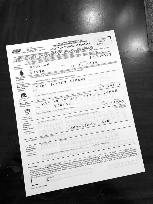

In [23]:
doc_img = cv2.imread("/content/drive/MyDrive/cv2_Images/document1.jpg", -1)
h, w, channels = doc_img.shape
doc_img = cv2.resize(doc_img, (int(w/5), int(h/5)))
doc_img_gray = cv2.cvtColor(doc_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(doc_img_gray)

# Sobel Edge Detection

calculating gradient along x-axis using sobel

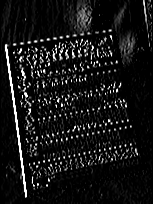

In [24]:
scale = 1
delta = 0
depth = cv2.CV_16S

grad_x = cv2.Sobel(doc_img_gray, depth, 1, 0,
                   ksize=3,
                   scale=scale,
                   delta=delta,
                   borderType=cv2.BORDER_DEFAULT)

cv2_imshow(grad_x)

calculating gradient along y-axis

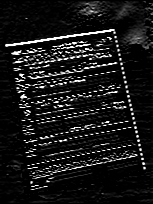

In [25]:
scale = 1
delta = 0
depth = cv2.CV_16S

grad_y = cv2.Sobel(doc_img_gray, depth, 0, 1,
                   ksize=3,
                   scale=scale,
                   delta=delta,
                   borderType=cv2.BORDER_DEFAULT)

cv2_imshow(grad_y)

calculating gradient along both x and y axis

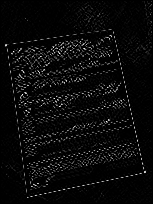

In [26]:
scale = 1
delta = 0
depth = cv2.CV_16S

grad = cv2.Sobel(doc_img_gray, depth, 1, 1,
                   ksize=3,
                   scale=scale,
                   delta=delta,
                   borderType=cv2.BORDER_DEFAULT)

cv2_imshow(grad)

# Laplacian Edge Detector

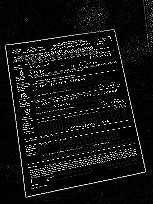

In [27]:
ddepth = cv2.CV_16S
kernel_size = 3

lap_img = cv2.Laplacian(doc_img_gray,
                        ddepth,
                        kernel_size,);

cv2_imshow(lap_img)

# Canny Edge Detection

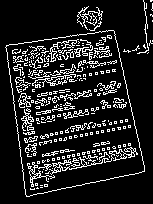

In [28]:
upper = 100
lower = 200

canny_img = cv2.Canny(doc_img_gray,
                      lower,
                      upper,)

cv2_imshow(canny_img)

# Capture the outer Edge of Document
1. we will perform bluring operation to reduce the noise.
2. morphological operation on image to reduce high frequency signals such as text.
3. use any edge detector   

gussian blur on the document

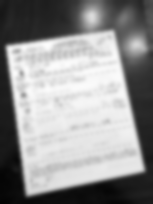

In [39]:
kernel_size = (11, 11)

doc_blur = cv2.GaussianBlur(doc_img_gray,
                            kernel_size,
                            0)

cv2_imshow(doc_blur)

morphological operations

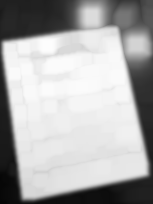

In [45]:
# This morphological operation is known as morphological closing operation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))

doc_dilate = cv2.dilate(doc_blur, kernel) # first dilate

doc_erode = cv2.erode(doc_dilate, kernel) # followed by erosion

cv2_imshow(doc_dilate)

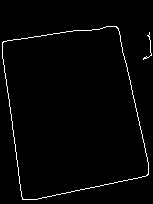

In [46]:
upper = 100
lower = 200

canny_img = cv2.Canny(doc_dilate,
                      lower,
                      upper,)

cv2_imshow(canny_img)